In [1]:
# # linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from datetime import datetime, timedelta,date
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis




from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as seabornInstance 
from sklearn.metrics import r2_score,mean_squared_error

#import project datafile
df = pd.read_csv("titanic.csv")
print(df)        
           


      pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   
1309     NaN       NaN                                              NaN   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.00

In [2]:
#describe of the datafile project
df.describe()


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [3]:
#the datafile project info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 107.5+ KB


In [4]:

#list of the first ten lines of he data project file

df.head(10)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [5]:
 #list of the first five  lines of he data project file > default head list

df=df.drop(1309)

In [6]:

# import of Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


 

In [7]:
# default head list of the Nan VALUES  TRUE IS YES  else False 
print(df.head().isnull())


   pclass  survived   name    sex    age  sibsp  parch  ticket   fare  cabin  \
0   False     False  False  False  False  False  False   False  False  False   
1   False     False  False  False  False  False  False   False  False  False   
2   False     False  False  False  False  False  False   False  False  False   
3   False     False  False  False  False  False  False   False  False  False   
4   False     False  False  False  False  False  False   False  False  False   

   embarked   boat   body  home.dest  
0     False  False   True      False  
1     False  False   True      False  
2     False   True   True      False  
3     False   True  False      False  
4     False   True   True      False  


In [8]:
# numbers of NaN per columns
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [9]:
# another step to clean data 
#delete the column or columns where all are NaN

df.dropna(axis = 1 , how = 'all')
#delete the rowor rows where all are NaN

df.dropna(axis = 0 , how = 'all')
# alook to the data file

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [10]:
# total number of NaN in the datafile

df.isnull().sum().sum()

3855

In [11]:

df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [12]:

#insert values into missing ages (mean of the existant ages)
    
df['age'].fillna(df['age'].median(),inplace = True)
df['fare'].fillna(df['fare'].median(),inplace = True)


In [13]:
# what's the number of NaN  now ?
df.isnull().sum().sum()

3591

In [14]:
# another step to clean data 
#delete the column or columns where all are NaN

df.dropna(axis = 1 , how = 'all')
#delete the rowor rows where all are NaN

df.dropna(axis = 0 , how = 'all')
# alook to the data file
print (df)
# alook to the total NaN number 
df.isnull().sum().sum()

      pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304     3.0       0.0                             Zabour, Miss. Hileni   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.00

3591

In [15]:
# another clean delete lines where there >=7  NaN
df.dropna(thresh=7)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,28.0000,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


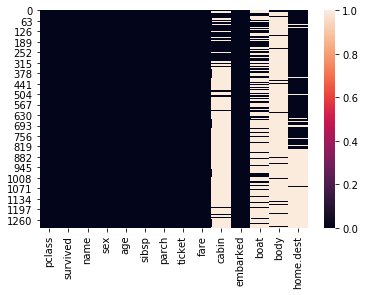

In [16]:
# just a previsualisation for me before (the real after all cleanings)

sns.heatmap(df.isna())

In [17]:
df.dropna(axis=0,how='all',inplace=True)
df.dropna(axis=1,how='all',inplace=True)


In [18]:
df['age'].fillna(df['age'].median(),inplace=True)


In [19]:
df['fare'].fillna(df['fare'].median(),inplace=True)



In [20]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1309 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1309 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 117.6+ KB


In [22]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [23]:
df["body"].fillna("999",inplace=True)

In [24]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        2
boat          823
body            0
home.dest     564
dtype: int64

In [25]:
df["cabin"].fillna("ff",inplace=True)

df["embarked"].fillna("ff",inplace=True)
df["boat"].fillna("ff",inplace=True)
df["home.dest"].fillna("ff",inplace=True)




 

In [26]:
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

In [27]:
df.isnull().sum().sum()

0

In [28]:

# another step of preprocessing 
# use of  tools to get in the data file project only numbers 
# import of Algorithms


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [29]:

df['home.dest']= encoder.fit_transform (df['home.dest'])

In [30]:
df['cabin']= encoder.fit_transform (df['cabin'])

df['embarked']= encoder.fit_transform (df['embarked'])
df['boat']= encoder.fit_transform (df['boat'])

df['home.dest']= encoder.fit_transform (df['home.dest'])
df['age']= encoder.fit_transform (df['age'])




In [31]:
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

In [32]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3.0,0.0,"Zabour, Miss. Hileni",female,22,1.0,0.0,2665,14.4542,186,0,27,328,369
1305,3.0,0.0,"Zabour, Miss. Thamine",female,42,1.0,0.0,2665,14.4542,186,0,27,999,369
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,40,0.0,0.0,2656,7.2250,186,0,27,304,369
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,41,0.0,0.0,2670,7.2250,186,0,27,999,369
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,44,0.0,0.0,315082,7.8750,186,2,27,999,369


In [33]:

df['sex'] = df['sex'].map({'female':1, 'male':0})


In [34]:
df['sex']= encoder.fit_transform (df['sex'])

In [35]:
df.head(55)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1,44,0.0,0.0,24160,211.3375,43,2,11,999,308
1,1.0,1.0,"Allison, Master. Hudson Trevor",0,6,1.0,2.0,113781,151.5500,79,2,2,999,230
2,1.0,0.0,"Allison, Miss. Helen Loraine",1,8,1.0,2.0,113781,151.5500,79,2,27,999,230
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0,45,1.0,2.0,113781,151.5500,79,2,27,135,230
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,38,1.0,2.0,113781,151.5500,79,2,27,999,230
5,1.0,1.0,"Anderson, Mr. Harry",0,70,0.0,0.0,19952,26.5500,149,2,12,999,236
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",1,87,1.0,0.0,13502,77.9583,145,2,1,999,161
7,1.0,0.0,"Andrews, Mr. Thomas Jr",0,59,0.0,0.0,112050,0.0000,15,2,27,999,23
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",1,75,2.0,0.0,11769,51.4792,61,2,26,999,21
9,1.0,0.0,"Artagaveytia, Mr. Ramon",0,94,0.0,0.0,PC 17609,49.5042,186,0,27,22,228


In [36]:
# to make numbers more easy i make a round of the datafile
#because it's not very important IN THIS CASE to have more decimals 

df.round(1)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1,44,0.0,0.0,24160,211.3,43,2,11,999,308
1,1.0,1.0,"Allison, Master. Hudson Trevor",0,6,1.0,2.0,113781,151.6,79,2,2,999,230
2,1.0,0.0,"Allison, Miss. Helen Loraine",1,8,1.0,2.0,113781,151.6,79,2,27,999,230
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0,45,1.0,2.0,113781,151.6,79,2,27,135,230
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,38,1.0,2.0,113781,151.6,79,2,27,999,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",1,22,1.0,0.0,2665,14.5,186,0,27,328,369
1305,3.0,0.0,"Zabour, Miss. Thamine",1,42,1.0,0.0,2665,14.5,186,0,27,999,369
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",0,40,0.0,0.0,2656,7.2,186,0,27,304,369
1307,3.0,0.0,"Zakarian, Mr. Ortin",0,41,0.0,0.0,2670,7.2,186,0,27,999,369


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null int32
age          1309 non-null int32
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1309 non-null float64
cabin        1309 non-null int32
embarked     1309 non-null int32
boat         1309 non-null int32
body         1309 non-null object
home.dest    1309 non-null int32
dtypes: float64(5), int32(6), object(3)
memory usage: 107.4+ KB


In [38]:


df.shape

(1309, 14)

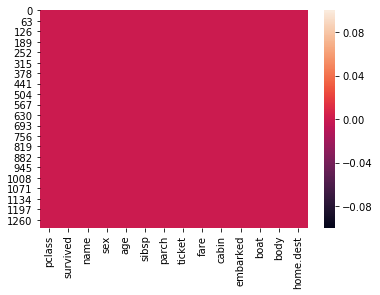

In [39]:
# may be the data file is clean  and all is numbers 
#now a visualization is possible

sns.heatmap(df.isna())

In [40]:
pd.crosstab([df["sex"], df["survived"]], df["pclass"], 
            margins = True).style.background_gradient(cmap = "summer_r")

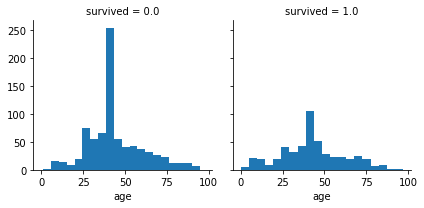

In [41]:
g = sns.FacetGrid(df, col='survived')
g.map(plt.hist, 'age', bins=20)

c:\python3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


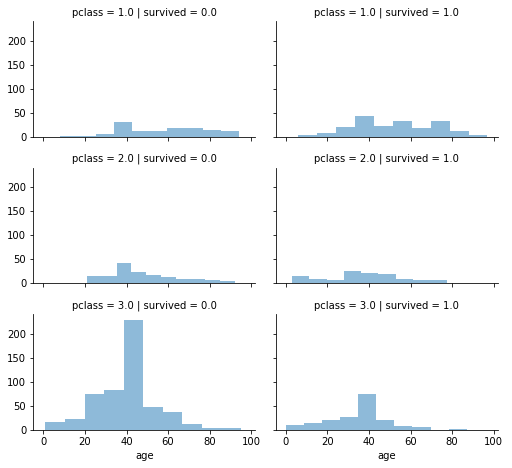

In [42]:
# grid = sns.FacetGrid(df, col='pclass', hue='survived')
grid = sns.FacetGrid(df, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist,'age', alpha=.5, bins=10)
grid.add_legend();

In [43]:
 Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }


print(Title_Dictionary)
     






{'Capt': 'Officer', 'Col': 'Officer', 'Major': 'Officer', 'Dr': 'Officer', 'Rev': 'Officer', 'Jonkheer': 'Royalty', 'Don': 'Royalty', 'Sir': 'Royalty', 'Lady': 'Royalty', 'the Countess': 'Royalty', 'Dona': 'Royalty', 'Mme': 'Miss', 'Mlle': 'Miss', 'Miss': 'Miss', 'Ms': 'Mrs', 'Mr': 'Mrs', 'Mrs': 'Mrs', 'Master': 'Master'}


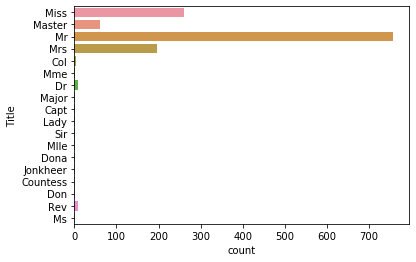

In [44]:
df['Title'] = df.name.str.extract('([A-Za-z]+)\.',expand=False)

sns.countplot(y='Title',data=df)  

In [45]:

df['Title'].replace(Title_Dictionary,inplace=True )



,Title,survived
0,Countess,1.000000
2,Miss,0.680608
5,Royalty,0.600000
1,Master,0.508197
4,Officer,0.304348
3,Mrs,0.291841


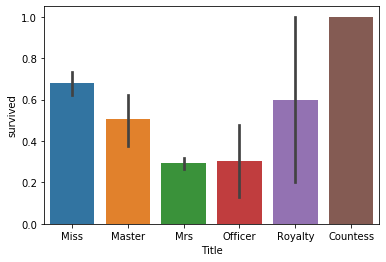

In [46]:
sns.barplot(x='Title',y='survived',data=df)
df[["Title", "survived"]].groupby(['Title'], as_index=False).mean().sort_values(by='survived', ascending=False)

,Title,age
5,Royalty,63.400000
4,Officer,65.347826
3,Mrs,47.521967
2,Miss,34.771863
1,Master,15.213115
0,Countess,50.000000


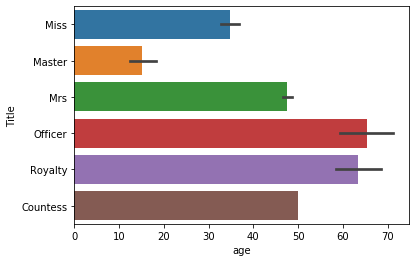

In [47]:
sns.barplot(x='age',y='Title',data=df)
df[["Title", "age"]].groupby(['Title'], as_index=False).mean().sort_values(by='Title', ascending=False)

In [48]:
df["FamilySize"]=df["sibsp"]+1+df["parch"]

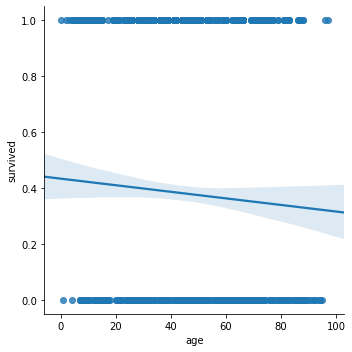

In [49]:
sns.lmplot(x='age',y='survived',data=df,palette='Set1')

In [50]:
df[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

df[['survived', 'fare']].groupby(['survived'], as_index=False).mean().sort_values(by='fare', ascending=False)


,survived,fare
1,1.0,49.361184
0,0.0,23.342830


,sex,age
0,0,42
1,1,42


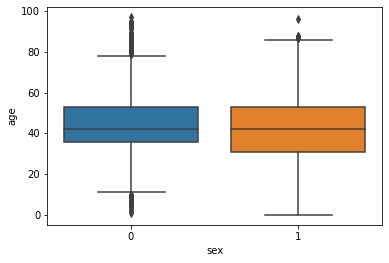

In [51]:
sns.boxplot(x='sex',y='age',data=df)
df.groupby('sex',as_index=False)['age'].median()

,Title,age
5,Royalty,63.400000
4,Officer,65.347826
3,Mrs,47.521967
2,Miss,34.771863
1,Master,15.213115
0,Countess,50.000000


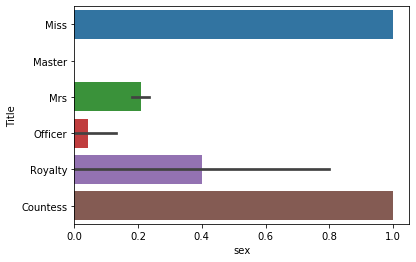

In [52]:
sns.barplot(x='sex',y='Title',data=df)
df[["Title", "age"]].groupby(['Title'], as_index=False).mean().sort_values(by='Title', ascending=False)

,Title,age
5,Royalty,63.400000
4,Officer,65.347826
3,Mrs,47.521967
2,Miss,34.771863
1,Master,15.213115
0,Countess,50.000000


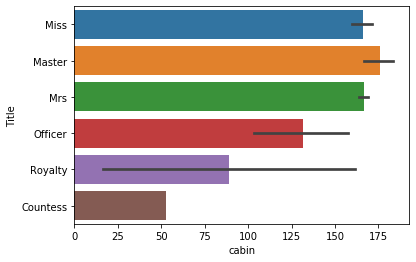

In [53]:
sns.barplot(x='cabin',y='Title',data=df)
df[["Title", "age"]].groupby(['Title'], as_index=False).mean().sort_values(by='Title', ascending=False)

,Title,age
5,Royalty,63.400000
4,Officer,65.347826
3,Mrs,47.521967
2,Miss,34.771863
1,Master,15.213115
0,Countess,50.000000


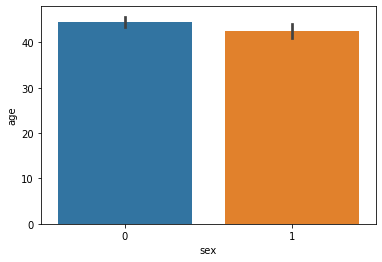

In [54]:
sns.barplot(x='sex',y='age',data=df)
df[["Title", "age"]].groupby(['Title'], as_index=False).mean().sort_values(by='Title', ascending=False)

In [55]:
df["FamilySize"]=df["sibsp"]+1+df["parch"]

In [56]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title,FamilySize
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",1,44,0.0,0.0,24160,211.3375,43,2,11,999,308,Miss,1.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",0,6,1.0,2.0,113781,151.5500,79,2,2,999,230,Master,4.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",1,8,1.0,2.0,113781,151.5500,79,2,27,999,230,Miss,4.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",0,45,1.0,2.0,113781,151.5500,79,2,27,135,230,Mrs,4.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,38,1.0,2.0,113781,151.5500,79,2,27,999,230,Mrs,4.0


,FamilySize,age
8,11.0,40.181818
7,8.0,28.000000
6,7.0,27.812500
5,6.0,31.080000
4,5.0,37.045455
3,4.0,31.488372
2,3.0,40.037736
1,2.0,47.446809
0,1.0,45.317722


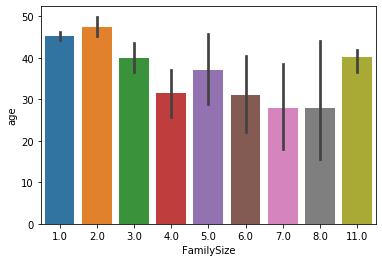

In [57]:
sns.barplot(x='FamilySize',y='age',data=df)
df[["FamilySize", "age"]].groupby(['FamilySize'], as_index=False).mean().sort_values(by='FamilySize', ascending=False)

In [58]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title,FamilySize
1304,3.0,0.0,"Zabour, Miss. Hileni",1,22,1.0,0.0,2665,14.4542,186,0,27,328,369,Miss,2.0
1305,3.0,0.0,"Zabour, Miss. Thamine",1,42,1.0,0.0,2665,14.4542,186,0,27,999,369,Miss,2.0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",0,40,0.0,0.0,2656,7.2250,186,0,27,304,369,Mrs,1.0
1307,3.0,0.0,"Zakarian, Mr. Ortin",0,41,0.0,0.0,2670,7.2250,186,0,27,999,369,Mrs,1.0
1308,3.0,0.0,"Zimmerman, Mr. Leo",0,44,0.0,0.0,315082,7.8750,186,2,27,999,369,Mrs,1.0


In [59]:
df.drop(['ticket','cabin','parch','name'], axis = 1, inplace = True)


In [60]:
df['survived'].unique()

array([1., 0.])

In [61]:
import pandas as pd
import numpy as np
# # linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from datetime import datetime, timedelta,date
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as seabornInstance 
from sklearn.metrics import r2_score,mean_squared_error
import re
import warnings
warnings.filterwarnings ('ignore')

import pandas as pd
import numpy as np
from matplotlib import cm as cm
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings ('ignore')

c:\python3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [65]:
X_train = df[['sibsp','sex','embarked','FamilySize','embarked' ,'sibsp','pclass' ]]

y_train = df["survived"]

In [84]:


from sklearn import tree
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 0, max_depth = 10,\
                        min_samples_split = 5,\
                        min_samples_leaf = 5) 
clf.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size = 0.2, shuffle = True, random_state = 99)
print('train shape: ',X_train.shape, y_train.shape)
print('test  shape: ',X_test.shape, y_test.shape)



# Predict for 1 observation
clf.predict(X_test.iloc[0].values.reshape(1, -1))# Predict for multiple observations
clf.predict(X_test[0:10])

# The score method returns the accuracy of the model
score = clf.score(X_test, y_test)

print('score :',score)

# List of values to try for max_depth:
max_depth_range = list(range(1, 6))# List to store the average RMSE for each value of max_depth:
accuracy = []
  
    
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, y_train)  
    score = clf.score(X_test, y_test)
    accuracy.append(score)
    print(accuracy) 
    
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)


    
print ('score:{}'.format(clf.score(X_train,y_train)))







train shape:  (273, 1) (273,)
test  shape:  (69, 1) (69,)
score : 0.7391304347826086
[0.6811594202898551]
[0.6811594202898551, 0.6956521739130435]
[0.6811594202898551, 0.6956521739130435, 0.6231884057971014]
[0.6811594202898551, 0.6956521739130435, 0.6231884057971014, 0.6521739130434783]
[0.6811594202898551, 0.6956521739130435, 0.6231884057971014, 0.6521739130434783, 0.6521739130434783]
score:0.7106227106227107


In [85]:


clf = DecisionTreeClassifier(random_state = 0, max_depth = 10,\
                        min_samples_split = 5,\
                        min_samples_leaf = 5) 
clf.fit(X_train, y_train)
train_score = np.mean(clf.score(X_train, y_train))
test_score = np.mean(clf.score(X_test, y_test))
print('train score:', train_score)
print('test score:', test_score)

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import os


train score: 0.7216117216117216
test score: 0.6521739130434783


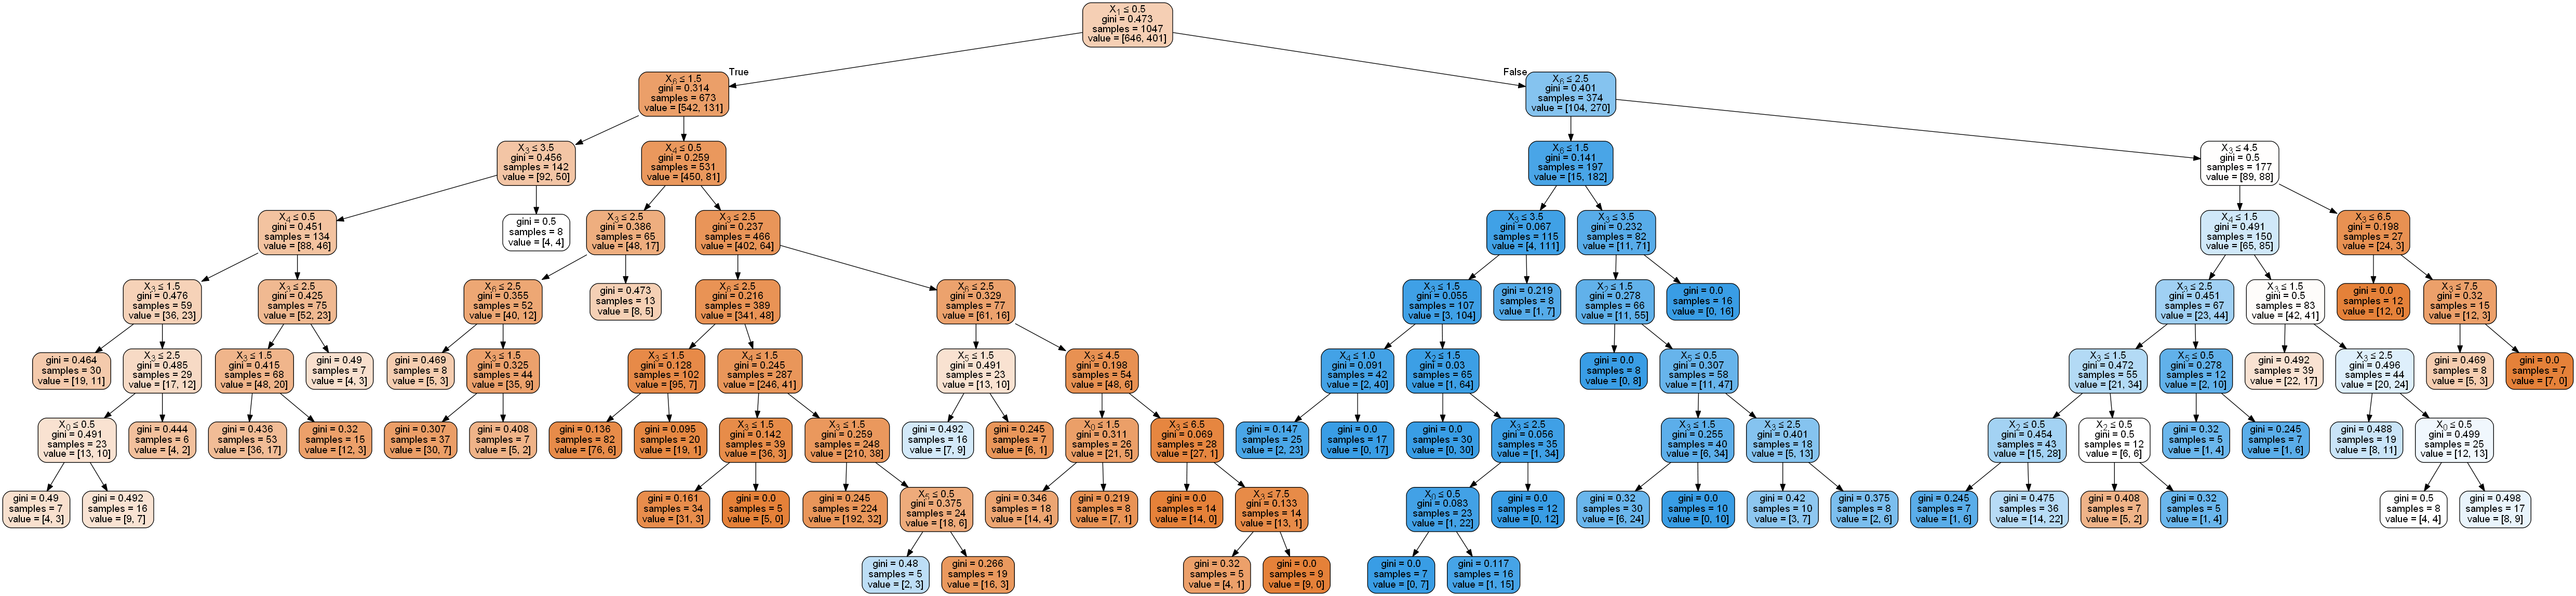

In [68]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from graphviz import Digraph
from sklearn.externals.six import StringIO

import os
r'C:\\Program Files (x86)\\Graphviz2.38\\bin\\'
os.environ["PATH"] += os.pathsep + r"C:\\Program Files (x86)\\Graphviz2.38\\bin\\" 

tree.export_graphviz(clf, out_file='tree.dot', feature_names = X_train.columns) 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
print(graph)
graph

Image(graph.create_png())



In [102]:
X_train = df[['pclass','sex','age']]

y_train = df["survived"]

In [103]:

from sklearn import tree
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

tree_params = {5: list(range(2,5))}

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size = 0.2, shuffle = True, random_state = 99)
print('train shape: ',X_train.shape, y_train.shape)
print('test  shape: ',X_test.shape, y_test.shape)

# Predict for 1 observation
clf.predict(X_test.iloc[0].values.reshape(1, -1))# Predict for multiple observations
clf.predict(X_test[0:10])

# The score method returns the accuracy of the model
score = clf.score(X_test, y_test)

print('score :',score)

# List of values to try for max_depth:
max_depth_range = list(range(1, 6))# List to store the average RMSE for each value of max_depth:
accuracy = []
  
    
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, y_train)  
    score = clf.score(X_test, y_test)
    accuracy.append(score)
    print(accuracy) 
    
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)


    
print ('score:{}'.format(clf.score(X_train,y_train)))



train shape:  (1047, 3) (1047,)
test  shape:  (262, 3) (262,)
score : 0.8015267175572519
[0.7977099236641222]
[0.7977099236641222, 0.8015267175572519]
[0.7977099236641222, 0.8015267175572519, 0.8091603053435115]
[0.7977099236641222, 0.8015267175572519, 0.8091603053435115, 0.8053435114503816]
[0.7977099236641222, 0.8015267175572519, 0.8091603053435115, 0.8053435114503816, 0.7862595419847328]
score:0.8099331423113658


score:0.8099331423113658


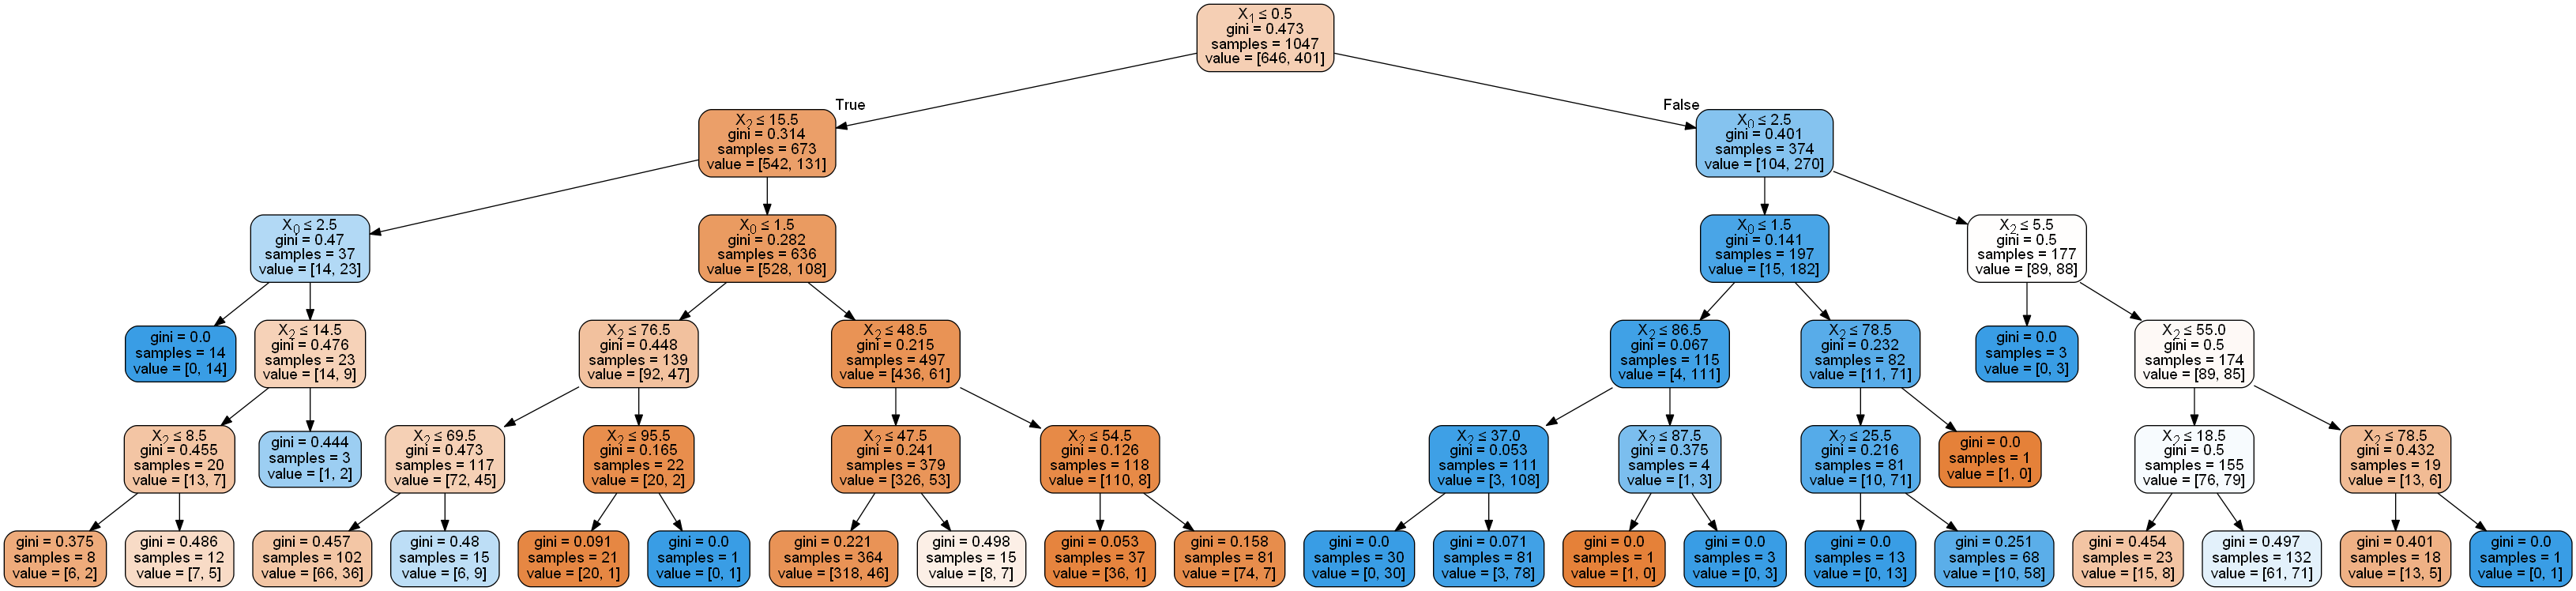

In [104]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from graphviz import Digraph
from sklearn.externals.six import StringIO


import os
r'C:\\Program Files (x86)\\Graphviz2.38\\bin\\'
os.environ["PATH"] += os.pathsep + r"C:\\Program Files (x86)\\Graphviz2.38\\bin\\" 

tree.export_graphviz(clf, out_file='tree.dot', feature_names = X_train.columns) 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

print ('score:{}'.format(clf.score(X_train,y_train)))
print(graph)
graph

Image(graph.create_png())



In [147]:
clf = DecisionTreeClassifier(random_state = 0, max_depth = opt_depth,\
                        min_samples_split = opt_split,\
                        min_samples_leaf = opt_leaf) 
clf.fit(X_train, y_train)
train_score = np.mean(clf.score(X_train, y_train))
test_score = np.mean(clf.score(X_test, y_test))
print('train score:',train_score)
print('test score:', test_score)

train score: 0.7936962750716332
test score: 0.8129770992366412


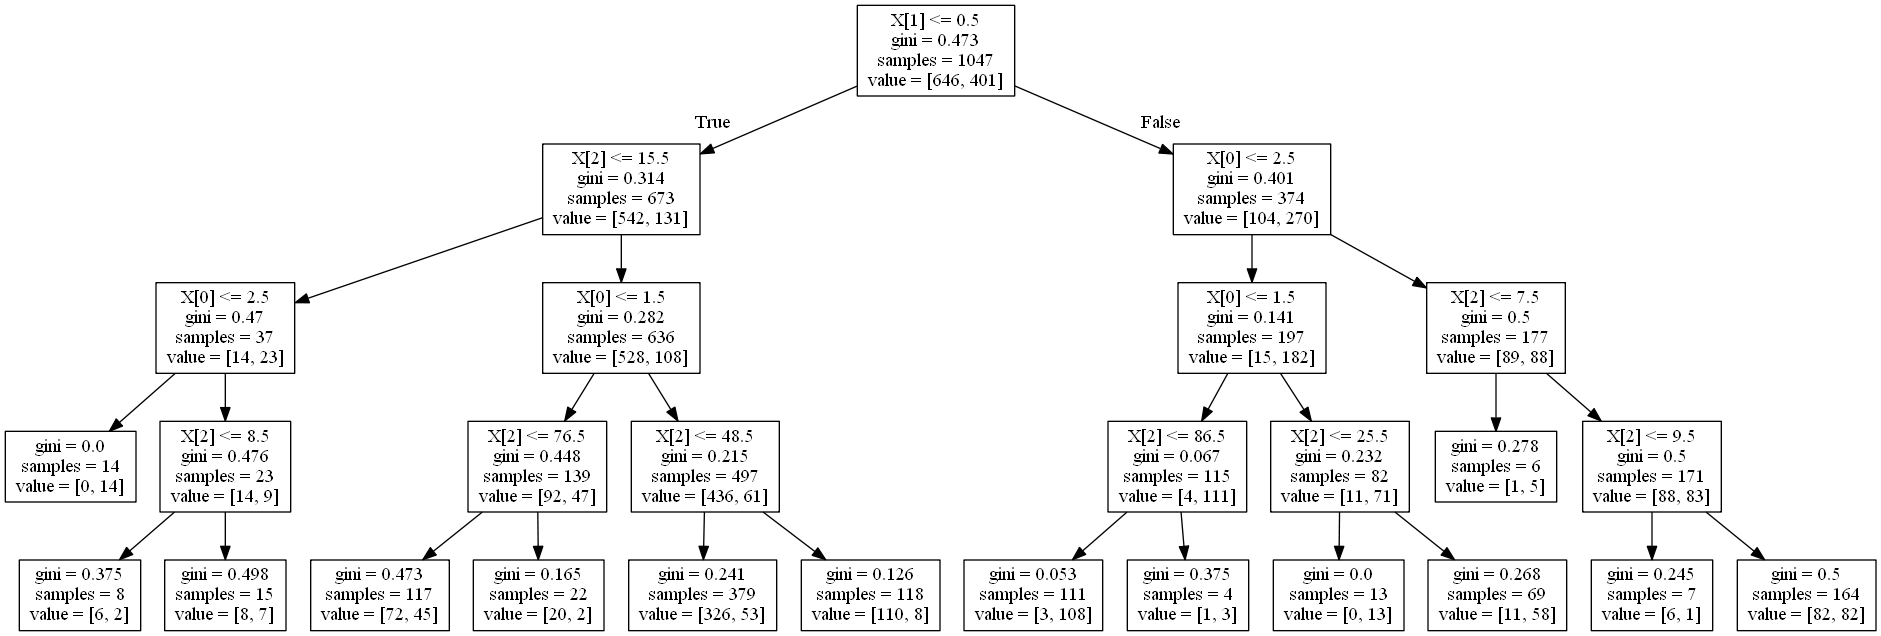

In [145]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

tree.export_graphviz(clf, out_file='tree.dot')  
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
print(graph)
Image(graph.create_png())

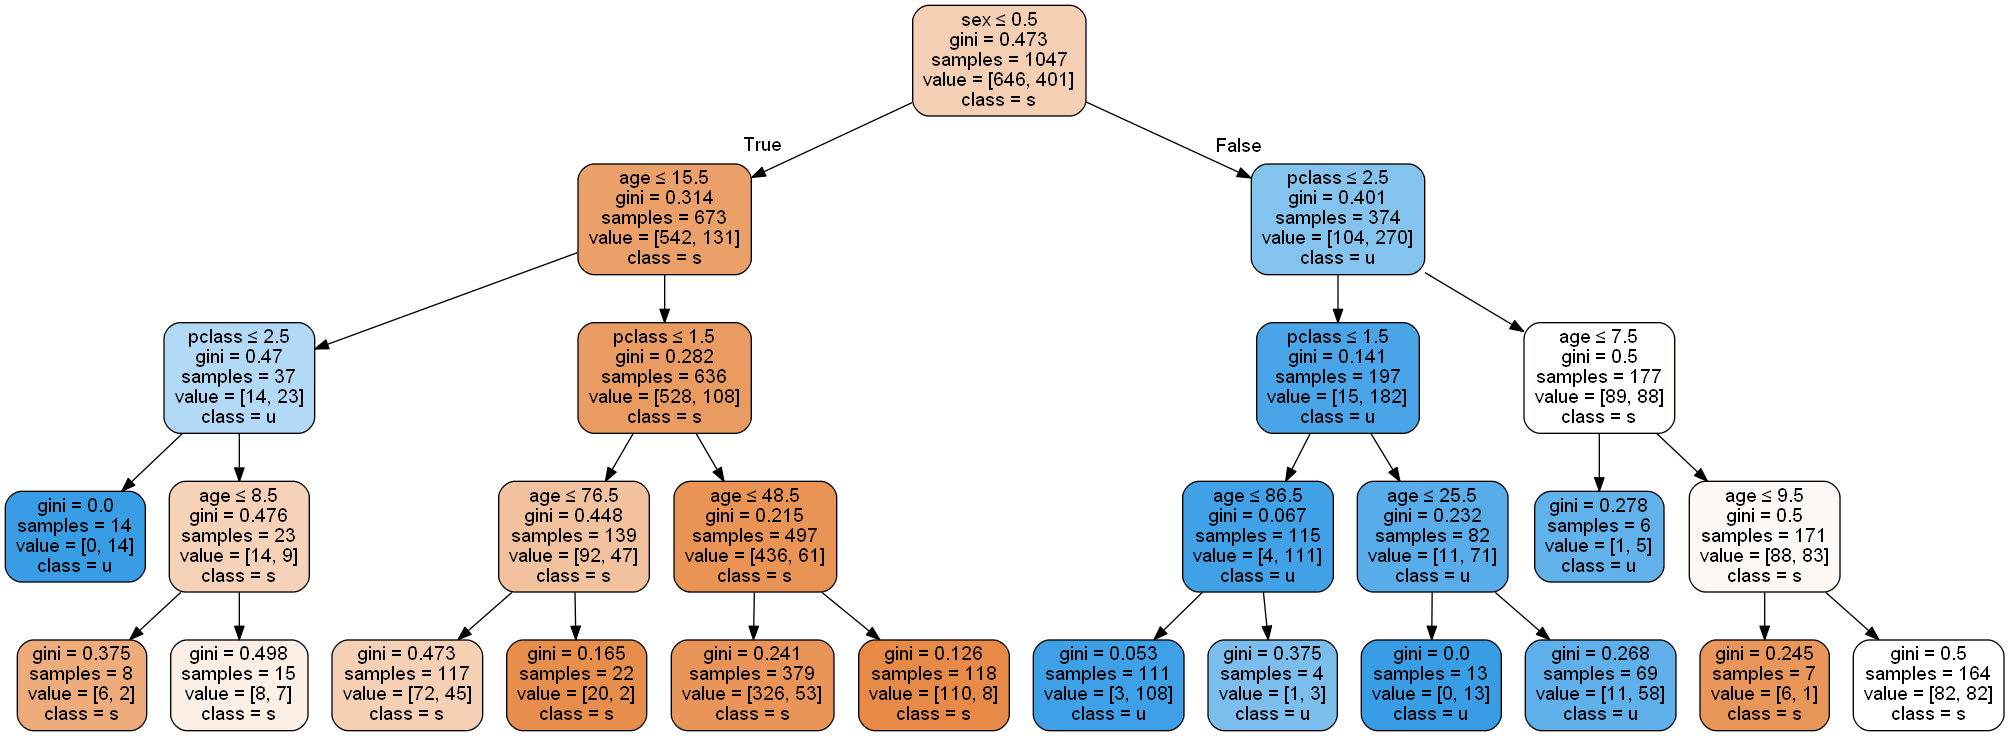

In [146]:
def plot_decision_tree(clf,feature_name,target_name):
    from IPython.display import Image 
   
    import pydotplus
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())
plot_decision_tree(clf,X_train.columns,df.columns[1])

Train score: 0.7936962750716332
Held-out test score: 0.8129770992366412


Text(0, 0.5, 'Gini Importance')

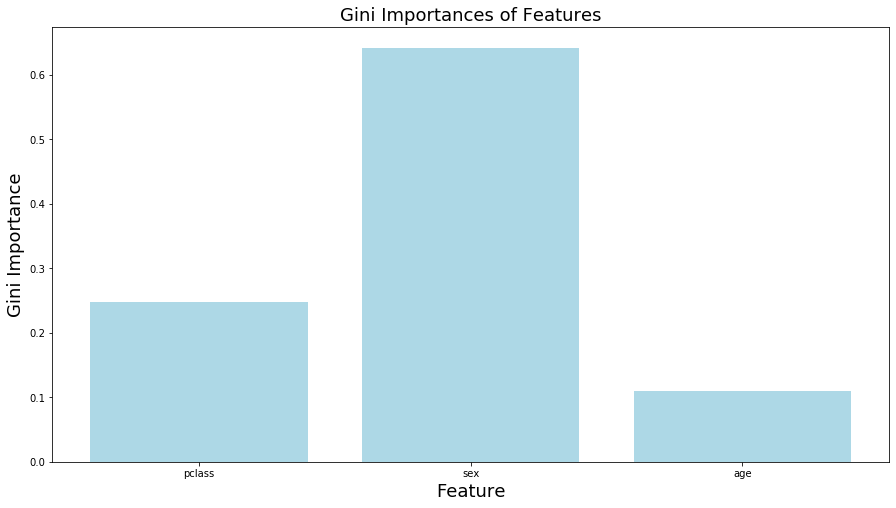

In [109]:
clf = DecisionTreeClassifier(random_state = 0, max_depth = 4, min_samples_split = opt_split,\
                        min_samples_leaf = opt_leaf)
clf.fit(X_train, y_train)
train_score = np.mean(clf.score(X_train, y_train))
test_score = np.mean(clf.score(X_test, y_test))
print('Train score:', train_score)
print('Held-out test score:', test_score)
gini_importance = pd.DataFrame(clf.feature_importances_, index = X_train.columns, columns = ['Gini importance'])

plt.figure(figsize = (15,8))
plt.bar(gini_importance.index, gini_importance['Gini importance'], color = 'lightblue')
plt.title('Gini Importances of Features', fontsize = 18)
plt.xlabel('Feature', fontsize = 18)
plt.ylabel('Gini Importance', fontsize = 18)

In [110]:
max_depth = [None,1,2,3,4]
min_samples_split = [2,3,4]
min_samples_leaf = [1,2,3,4]
K = 10

kf = KFold(n_splits = K)
opt_depth = np.nan
opt_split = np.nan
opt_leaf = np.nan
best_score = 0
val_list = []
train_list = []

for depth in max_depth:
    for split in min_samples_split:
        for leaf in min_samples_leaf:
            print('Training for max_depth:', depth, ', min_samples_split:',\
                  split, ', min_samples_leaf:', leaf)
            clf = DecisionTreeClassifier(random_state = 0, max_depth = depth,\
                                            min_samples_split = split,\
                                            min_samples_leaf = leaf)
            
            for train_index, test_index in kf.split(X_train):
                X, X_val = np.asarray(X_train)[train_index], np.asarray(X_train)[test_index]
                y, y_val = np.asarray(y_train)[train_index], np.asarray(y_train)[test_index]
                clf.fit(X, y)
                train_list.append(clf.score(X,y))
                val_list.append(clf.score(X_val,y_val))
                
            train_score = np.mean(train_list)
            val_score = np.mean(val_list)
            
        
            print('10-fold CV training score:', train_score)
            print('10-fold CV test score:', val_score)
            print()
            
            if val_score > best_score:
                opt_depth = depth
                opt_split = split
                opt_leaf = leaf
                best_score = val_score

Training for max_depth: None , min_samples_split: 2 , min_samples_leaf: 1
10-fold CV training score: 0.850047393578339
10-fold CV test score: 0.7535989010989012

Training for max_depth: None , min_samples_split: 2 , min_samples_leaf: 2
10-fold CV training score: 0.8433615781048424
10-fold CV test score: 0.756456043956044

Training for max_depth: None , min_samples_split: 2 , min_samples_leaf: 3
10-fold CV training score: 0.8389396972064432
10-fold CV test score: 0.7580372405372404

Training for max_depth: None , min_samples_split: 2 , min_samples_leaf: 4
10-fold CV training score: 0.8358797250046719
10-fold CV test score: 0.7602564102564102

Training for max_depth: None , min_samples_split: 3 , min_samples_leaf: 1
10-fold CV training score: 0.8386708183891588
10-fold CV test score: 0.7589249084249086

Training for max_depth: None , min_samples_split: 3 , min_samples_leaf: 2
10-fold CV training score: 0.8383383090961899
10-fold CV test score: 0.7589896214896216

Training for max_depth: 

10-fold CV training score: 0.7978123334665169
10-fold CV test score: 0.7743440053536208

Training for max_depth: 4 , min_samples_split: 3 , min_samples_leaf: 1
10-fold CV training score: 0.7978347827531301
10-fold CV test score: 0.7744019973736954

Training for max_depth: 4 , min_samples_split: 3 , min_samples_leaf: 2
10-fold CV training score: 0.7978288846244258
10-fold CV test score: 0.7744931149097816

Training for max_depth: 4 , min_samples_split: 3 , min_samples_leaf: 3
10-fold CV training score: 0.7978251311024478
10-fold CV test score: 0.774580919080919

Training for max_depth: 4 , min_samples_split: 3 , min_samples_leaf: 4
10-fold CV training score: 0.7978063503535301
10-fold CV test score: 0.7746657509157509

Training for max_depth: 4 , min_samples_split: 4 , min_samples_leaf: 1
10-fold CV training score: 0.7978273292185034
10-fold CV test score: 0.774714028661397

Training for max_depth: 4 , min_samples_split: 4 , min_samples_leaf: 2
10-fold CV training score: 0.7978219663665

In [138]:
max_depth = list(range(1,21))
min_samples_leaf = list(range(1,21))
K = 10

kf = KFold(n_splits = K)
train_score = []
val_score = []

for depth in max_depth:
    for leaf in min_samples_leaf:
        
        clf = DecisionTreeClassifier(random_state = 0, max_depth = depth, min_samples_leaf = leaf)
        for train_index, test_index in kf.split(X_train):
            X, X_val = np.asarray(X_train)[train_index], np.asarray(X_train)[test_index]
            y, y_val = np.asarray(y_train)[train_index], np.asarray(y_train)[test_index]
            clf.fit(X, y)
            train_list.append(clf.score(X,y))
            val_list.append(clf.score(X_val,y_val))

        train_score.append(np.mean(train_list))
        val_score.append(np.mean(val_list))

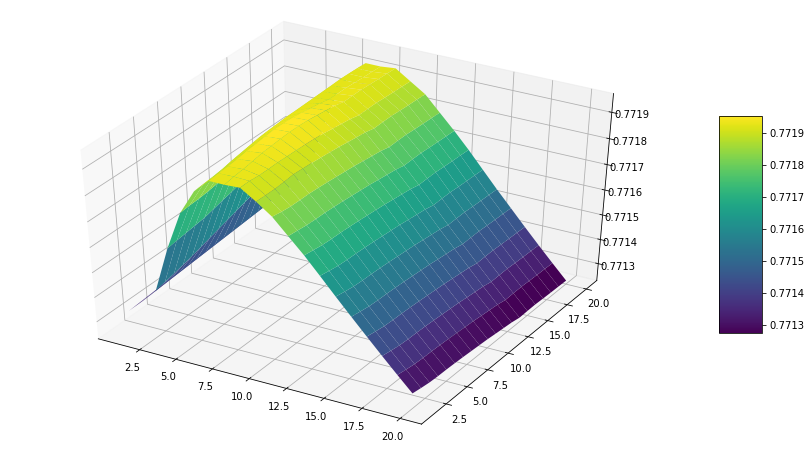

In [139]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Z = np.asarray(val_score).reshape(len(max_depth),len(min_samples_leaf))
X = np.asarray((max_depth * 20)).reshape(len(min_samples_leaf),len(max_depth))
Y = np.asarray((min_samples_leaf * 20)).reshape(len(min_samples_leaf),len(max_depth)).T

fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z.T, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(40)
plt.show()